# Using Relu instead of eLU and a Deeper Network (Extra Simulations)

One concern that may rise is that the presented vulnerability to adversarial attack \[1,2\] is due to the considered set-up rather than being a fundamental issue, e. g., one might think the vulnerability of autoencoders to adversarial attacks is a by product of using eLU activation function rather ReLU in the encoder block of the MLP autoencoder \[1\]. Moreover, one might think what happens if we use a deeper network? Maybe the vulnerablity is due to not a deep enough network.


In resposne to such concerns we should note the following points:
1. In the literature on deep learning and computer vision (e. g., see \[4,5,6 \]), it has been shown that vulnerability to adversarial attacks is an inherent property of ML algorithms. More specifically, researchers (e. g.,  \[4,5,6\] among many others) have tried many different variations of extremely deep networks (e.g., vgg, goglenet, resnet, etc.) with many different set of hyper parameters and have saw this systematic vulnerability.

2. The reason we used eLU was that it was originaly used by the authors of \[3\] in their implementation [HERE](https://colab.research.google.com/drive/1KLi10u-zUsdv1kQLAFcrRU0w0Gjd8QHN#scrollTo=Md3bzHC2UlB6). Therefore, we used the same activation to enable direct comparison.


But to address such concerns and to verify the observations in \[4,5,6\], we also consider two new networks, shown below. Network one (netOne_MLP) is the MLP network of the paper while its eLU activation function is replaced with ReLU. Network two (netTwo_DeepMLP) is a deeper MLP network with just ReLU activation functions. We show for both these cases our observations in the paper are valid. Below you can see the structure of these two networks. 

- netOne_MLP

| Block Name | Layer Name             | Output Dim. |
|------------|------------------------|-------------|
| Encoder    | Input                  |      M      |
| Encoder    | Dense + ReLU           |      M      |
| Encoder    | Dense+Linear           |      2n     |
| Encoder    | Normalization          |      2n     |
| Channel    | Noise (+ perturbation) |      2n     |
| Decoder    | Dense+ReLU             |      M      |
| Decoder    | Dense+Softmax          |      M      |

- netTwo_DeepMLP

| Block Name | Layer Name             | Output Dim. |
|------------|------------------------|-------------|
| Encoder    | Input                  |      M      |
| Encoder    | Dense + ReLU           |      M      |
| Encoder    | Dropout                |      2n     |
| Encoder    | Dense + ReLU           |      4n     |
| Encoder    | Dropout                |      4n     |
| Encoder    | Dense+Linear           |      2n     |
| Encoder    | Normalization          |      2n     |
| Channel    | Noise  (+Perturbation) |      2n     |
| Decoder    | Dense + ReLU           |      2M     |
| Decoder    | Dropout                |      2M     |
| Decoder    | Dense + ReLU           |      4M     |
| Decoder    | Dropout                |      4M     |
| Decoder    | Dense + ReLU           |      2M     |
| Decoder    | Dropout                |      2M     |
| Decoder    | Dense + Softmax        |      M      |

## Citing this Note Book
If you use any part of this code, please consider citing our following works:

- M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters. 

- M. Sadeghi and E. G. Larsson, “Adversarial attacks on deep-learning based radio signal classification,” IEEE Wireless Commun. Lett., vol. 8, no. 1, pp. 213–216, Feb. 2019.


If you have any questions, you can contact me via m.sadeghee@gmail.com.

<br>
<br>

## Our System Set Up
Below you can see our system specifications, which help you re-drive the same results.

In [1]:
import tensorflow as tf
tf.__version__

'1.7.0'

In [2]:
%%system
nvcc --version

['nvcc: NVIDIA (R) Cuda compiler driver',
 'Copyright (c) 2005-2017 NVIDIA Corporation',
 'Built on Fri_Sep__1_21:08:03_CDT_2017',
 'Cuda compilation tools, release 9.0, V9.0.176']

Belwo is the set of initial parameters we will be using.

In [3]:
# The required moduls and libraries  
import numpy as np
import pickle
import matplotlib.pyplot as plt


# general parameters
k = 4
n = 7
seed = 0
ebnodbs = np.linspace(0,14,15,dtype=int) 
batch_size = 1000000 

# the UAP 
with open('UAP','rb') as load_data:
    UAP = pickle.load(load_data)

### 1. netOne_MLP
Let us start with netOne_MLP. First, we create an instance of the class, and then we train it and save the trained model.

In [4]:
from All_Autoencoder_Classes import AE_netOne_MLP

# Training
train_EbNodB =  8.5
val_EbNodB = train_EbNodB
training_params = [
    #batch_size, lr, ebnodb, iterations
    [1000    , 0.001,  train_EbNodB, 1000],
    [1000    , 0.0001, train_EbNodB, 10000],
    [10000   , 0.0001, train_EbNodB, 10000]]


validation_params = [
    #batch_size, ebnodb, val_steps 
    [100000, val_EbNodB, 100],
    [100000, val_EbNodB, 1000],
    [100000, val_EbNodB, 1000]]

p = np.zeros([1,2,n])


# train netOne_MLP and save its model
print('training netOne_MLP started')
model_file_netOne_MLP = 'models_attacked_netOne_MLP/ae_k_{}_n_{}'.format(k,n)
ae_netOne_MLP = AE_netOne_MLP(k,n,seed)
ae_netOne_MLP.train(p,training_params, validation_params)
ae_netOne_MLP.save(model_file_netOne_MLP)
print('training netOne_MLP finished and model is saved.\n')

training netOne_MLP started

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.94370997
0.27552998
0.01414001
0.00085002184
0.0004799962
0.00019001961
0.00027000904
0.00011998415
0.00024998188
0.00014001131

Batch Size: 1000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
6.0021877e-05
6.997585e-05
5.0008297e-05
5.0008297e-05
2.9981136e-05
5.0008297e-05
6.0021877e-05
2.9981136e-05
2.9981136e-05
6.0021877e-05

Batch Size: 10000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
3.9994717e-05
2.002716e-05
2.002716e-05
2.002716e-05
1.001358e-05
2.002716e-05
0.0
1.001358e-05
1.001358e-05
1.001358e-05
training netOne_MLP finished and model is saved.



Now we attack all these models using the UAP as a black-box attack.

PSR_dB 2 finished
PSR_dB -6 finished


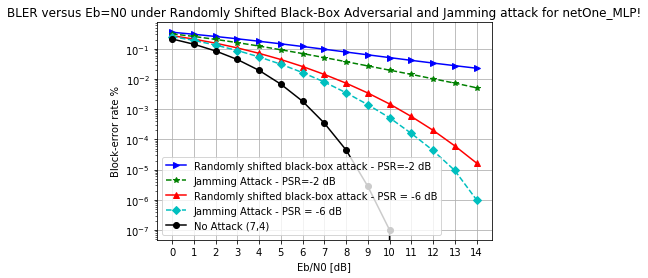

In [5]:
PSR_dB = -2
Net1_BLER_NoAttack , Net1_BLER_AdvAttack_minus2 , Net1_BLER_JamAttack_minus2 = ae_netOne_MLP.bler_sim_attack_AWGN(UAP.reshape(1,2,n), PSR_dB, ebnodbs, batch_size, 10)
print('PSR_dB 2 finished')
PSR_dB = -6
_,  Net1_BLER_AdvAttack_minus6, Net1_BLER_JamAttack_minus6 = ae_netOne_MLP.bler_sim_attack_AWGN(UAP.reshape(1,2,n), PSR_dB, ebnodbs, batch_size, 10)
print('PSR_dB -6 finished')

fig, ax = plt.subplots()
ax.plot(ebnodbs,Net1_BLER_AdvAttack_minus2,'b>-',label='Randomly shifted black-box attack - PSR=-2 dB')
ax.plot(ebnodbs,Net1_BLER_JamAttack_minus2,'g*--',label='Jamming Attack - PSR=-2 dB')
ax.plot(ebnodbs,Net1_BLER_AdvAttack_minus6,'r^-',label='Randomly shifted black-box attack - PSR = -6 dB')
ax.plot(ebnodbs,Net1_BLER_JamAttack_minus6,'cD--',label='Jamming Attack - PSR = -6 dB')


ax.plot(ebnodbs,Net1_BLER_NoAttack,'ko-',label='No Attack ({},{})'.format(n,k))
plt.title('BLER versus Eb=N0 under Randomly Shifted Black-Box Adversarial and Jamming attack for netOne_MLP!')
plt.yscale('log')
plt.legend(loc='lower left')
plt.xticks(ebnodbs,ebnodbs)
ax.set_xlabel('Eb/N0 [dB]')
ax.set_ylabel('Block-error rate %')
ax.grid(True)
plt.show()

### 2 netTwo_DeepMLP
Let us start with netTwo_DeepMLP. Again, we create an instance of the class, and then we train it and save the trained model.

In [6]:
from All_Autoencoder_Classes import AE_netTwo_DeepMLP

# train netTwo_DeepMLP and save its model
print('training netTwo_DeepMLP started')
model_file_netTwo_DeepMLP = 'models_attacked_netTwo_DeepMLP/ae_k_{}_n_{}'.format(k,n)
ae_netTwo_DeepMLP = AE_netTwo_DeepMLP(k,n,seed)
ae_netTwo_DeepMLP.train(True, 0.1, p,training_params, validation_params)
ae_netTwo_DeepMLP.save(model_file_netTwo_DeepMLP)
print('training netTwo_DeepMLP finished and model is saved.\n')

training netTwo_DeepMLP started

Batch Size: 1000, Learning Rate: 0.001, EbNodB: 8.5, Iterations: 1000
0.91368
0.23421001
0.10385001
0.07941002
0.064530015
0.056159973
0.05146998
0.04632002
0.043280005
0.04097998

Batch Size: 1000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
0.038230002
0.035300016
0.03455001
0.032400012
0.03125
0.02986002
0.029959977
0.028140008
0.027999997
0.026520014

Batch Size: 10000, Learning Rate: 0.0001, EbNodB: 8.5, Iterations: 10000
0.024770021
0.024779975
0.024349988
0.022440016
0.021619976
0.020510018
0.019580007
0.018490016
0.017929971
0.017040014
training netTwo_DeepMLP finished and model is saved.



Now we attack all these models using the UAP as a black-box attack.

PSR_dB 2 finished
PSR_dB -6 finished


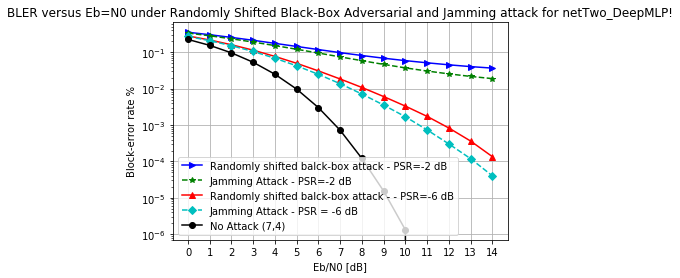

In [7]:
# netTwo_DeepMLP - The Deep MLP of table 2
PSR_dB = -2
Net2_BLER_NoAttack,Net2_BLER_AdvAttack_Roled_minus2, Net2_BLER_JamAttack_minus2 = ae_netTwo_DeepMLP.bler_sim_attack_AWGN(False, 0, UAP.reshape(1,2,n), PSR_dB, ebnodbs, batch_size, 10)
print('PSR_dB 2 finished')
PSR_dB = -6
_, Net2_BLER_AdvAttack_Roled_minus6, Net2_BLER_JamAttack_minus6 = ae_netTwo_DeepMLP.bler_sim_attack_AWGN(False, 0, UAP.reshape(1,2,n), PSR_dB, ebnodbs, batch_size, 10)
print('PSR_dB -6 finished')


# plot the attack result
fig, ax = plt.subplots()

ax.plot(ebnodbs,Net2_BLER_AdvAttack_Roled_minus2,'b>-',label='Randomly shifted balck-box attack - PSR=-2 dB')
ax.plot(ebnodbs,Net2_BLER_JamAttack_minus2,'g*--',label='Jamming Attack - PSR=-2 dB')

ax.plot(ebnodbs,Net2_BLER_AdvAttack_Roled_minus6,'r^-',label='Randomly shifted balck-box attack - - PSR=-6 dB')
ax.plot(ebnodbs,Net2_BLER_JamAttack_minus6,'cD--',label='Jamming Attack - PSR = -6 dB')

ax.plot(ebnodbs,Net2_BLER_NoAttack,'ko-',label='No Attack ({},{})'.format(n,k))
plt.title('BLER versus Eb=N0 under Randomly Shifted Black-Box Adversarial and Jamming attack for netTwo_DeepMLP!')
plt.yscale('log')
plt.legend(loc='lower left')
plt.xticks(ebnodbs,ebnodbs)
ax.set_xlabel('Eb/N0 [dB]')
ax.set_ylabel('Block-error rate %')
ax.grid(True)
plt.show()

# References
\[1\] M. Sadeghi and E. G. Larsson, "Physical Adversarial Attacks Against End-to-End Autoencoder Communication Systems," in IEEE Communications Letters.

\[2\] - M. Sadeghi and E. G. Larsson, “Adversarial attacks on deep-learning based radio signal classification,” IEEE Wireless Commun. Lett., vol. 8, no. 1, pp. 213–216, Feb. 2019.

\[3\] T. O’Shea and J. Hoydis, “An introduction to deep learning for the physical layer,” IEEE Transactions on Cognitive Communications and Networking, vol. 3, no. 4, pp. 563–575, Dec. 2017.

\[4\] N. Papernot, P. D. McDaniel, and I. J. Goodfellow, “Transferability in machine learning: from phenomena to black-box attacks using adversarial samples,” CoRR, vol. abs/1605.07277, 2016

\[5\] C. Szegedy, W. Zaremba, I. Sutskever, J. Bruna, D. Erhan, I. Goodfellow, and R. Fergus, “Intriguing properties of neural networks,” arXiv preprint arXiv:1312.6199, 2013.

\[6\] I. J. Goodfellow, J. Shlens, and C. Szegedy, “Explaining and harnessing adversarial examples,” arXiv preprint arXiv:1412.6572, 2014.